In [9]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(car)
library(MASS)
library(randomForest)

In [3]:
data <- read.csv("combined_midwest_data_with_dup.csv")

summary(data)

 STATENAME.x           ST_CASE          MONTH.x       MONTHNAME.x       
 Length:39157       Min.   :170001   Min.   : 1.000   Length:39157      
 Class :character   1st Qu.:190015   1st Qu.: 5.000   Class :character  
 Mode  :character   Median :290299   Median : 8.000   Mode  :character  
                    Mean   :302076   Mean   : 7.727                     
                    3rd Qu.:391156   3rd Qu.:11.000                     
                    Max.   :550562   Max.   :12.000                     
     DAY.x        DAYNAME.x       DAY_WEEK     DAY_WEEKNAME      
 Min.   : 1.0   Min.   : 1.0   Min.   :1.000   Length:39157      
 1st Qu.: 9.0   1st Qu.: 9.0   1st Qu.:3.000   Class :character  
 Median :19.0   Median :19.0   Median :5.000   Mode  :character  
 Mean   :16.9   Mean   :16.9   Mean   :4.445                     
 3rd Qu.:23.0   3rd Qu.:23.0   3rd Qu.:6.000                     
 Max.   :31.0   Max.   :31.0   Max.   :7.000                     
      YEAR          HOUR.x 

In [24]:
data_clean <- data %>%
  filter(
    TRAV_SP <= 140, 
    AGE <= 97, 
    HOUR.x <= 23,     
    WEATHERNAME != "Sleet or Hail",
    WEATHERNAME != "Reported as Unknown",
    LGT_CONDNAME != "Reported as Unknown"
  )  # Remove outliers

In [25]:
data_clean$Severe <- ifelse(data_clean$INJ_SEVNAME %in% c("Fatal Injury (K)", "Suspected Serious Injury (A)"), 1, 0)

# Convert categorical variables to factors
data_clean <- data_clean %>%
  mutate(
    WEATHERNAME = as.factor(WEATHERNAME),
    LGT_CONDNAME = as.factor(LGT_CONDNAME),
    VSURCONDNAME = as.factor(VSURCONDNAME),
    DR_DRINKNAME = as.factor(DR_DRINKNAME)
  )

### Exploratory Data Analysis

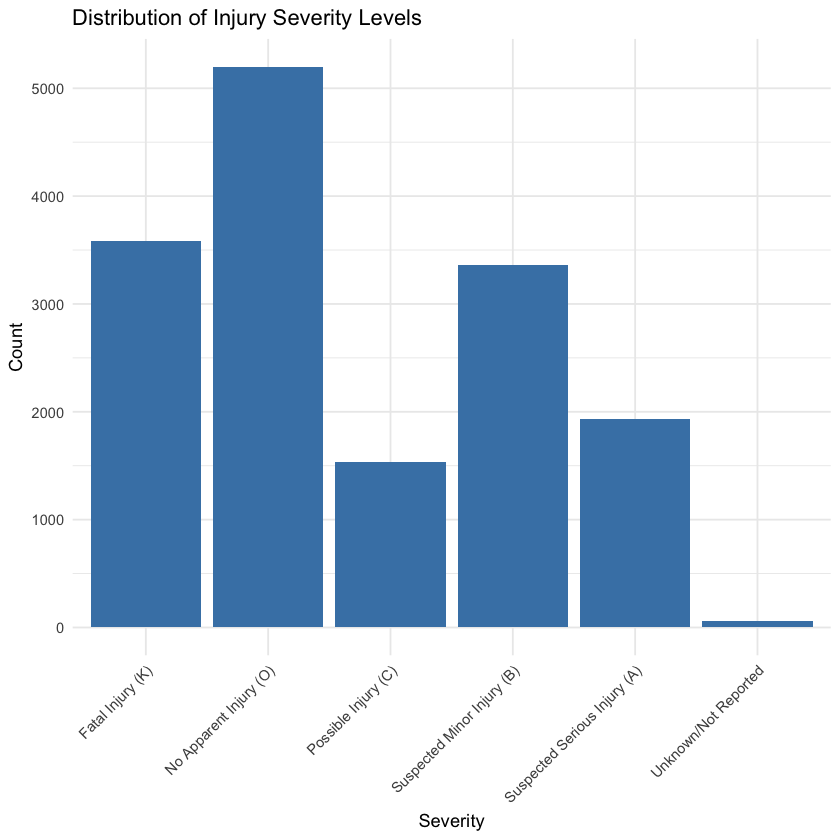

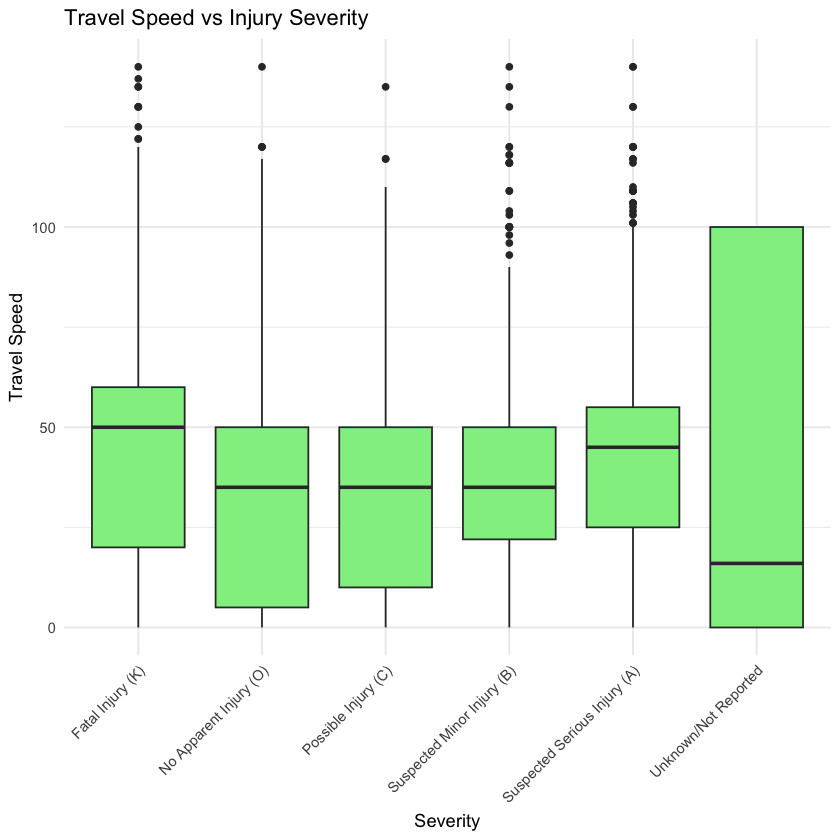

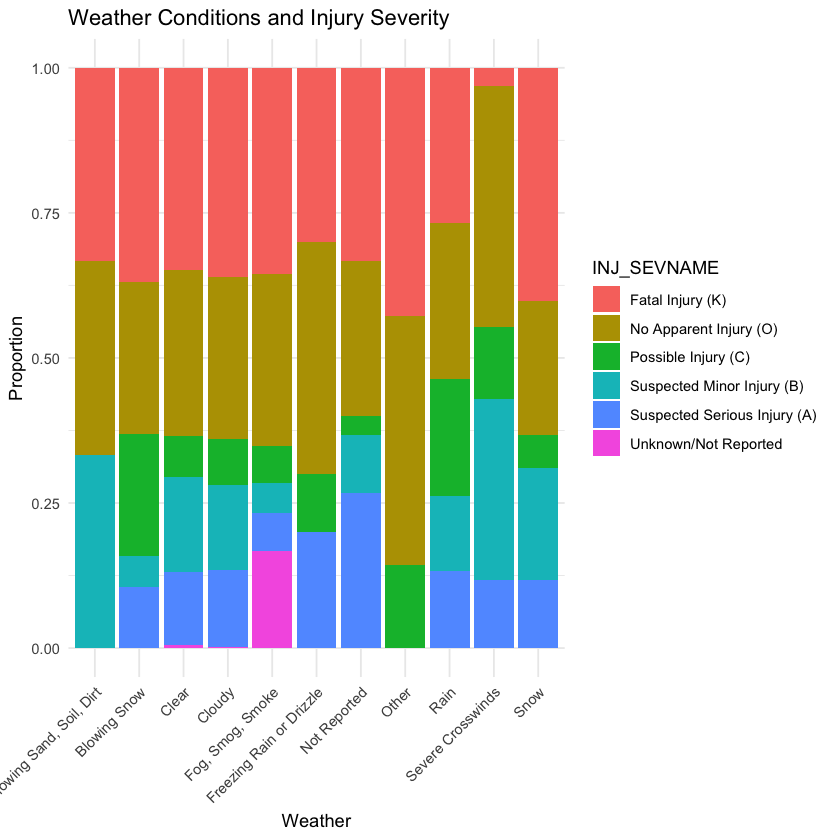

In [26]:
# 1. Distribution of Severity Levels
ggplot(data_clean, aes(x = INJ_SEVNAME)) +
  geom_bar(fill = "steelblue") +
  labs(title = "Distribution of Injury Severity Levels", x = "Severity", y = "Count") +
  theme_minimal()+
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# 2. Travel Speed vs. Severity
ggplot(data_clean, aes(x = INJ_SEVNAME, y = TRAV_SP)) +
  geom_boxplot(fill = "lightgreen") +
  labs(title = "Travel Speed vs Injury Severity", x = "Severity", y = "Travel Speed") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# 3. Weather Conditions and Severity
ggplot(data_clean, aes(x = WEATHERNAME, fill = INJ_SEVNAME)) +
  geom_bar(position = "fill") +
  labs(title = "Weather Conditions and Injury Severity", x = "Weather", y = "Proportion") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

### Logistic Regression Model

In [14]:
# Fit Logistic Regression
logistic_model <- glm(Severe ~ TRAV_SP + DR_DRINKNAME + WEATHERNAME +
                        LGT_CONDNAME + VSURCONDNAME, 
                      data = data_clean, 
                      family = "binomial")

# Model Summary
summary(logistic_model)

# Odds Ratios and Confidence Intervals
exp(cbind(OR = coef(logistic_model), confint(logistic_model)))


Call:
glm(formula = Severe ~ TRAV_SP + DR_DRINKNAME + WEATHERNAME + 
    LGT_CONDNAME + VSURCONDNAME, family = "binomial", data = data_clean)

Coefficients:
                                                Estimate Std. Error z value
(Intercept)                                   -5.458e-01  8.682e-01  -0.629
TRAV_SP                                        9.436e-03  7.219e-04  13.070
DR_DRINKNAMEYes                                4.266e-01  7.083e-02   6.022
WEATHERNAMEBlowing Snow                        6.298e-02  9.913e-01   0.064
WEATHERNAMEClear                               1.345e-01  8.669e-01   0.155
WEATHERNAMECloudy                              2.040e-01  8.678e-01   0.235
WEATHERNAMEFog, Smog, Smoke                   -1.127e-02  8.833e-01  -0.013
WEATHERNAMEFreezing Rain or Drizzle            3.612e-01  1.090e+00   0.331
WEATHERNAMENot Reported                        5.614e-01  9.462e-01   0.593
WEATHERNAMEOther                               2.835e-02  1.024e+00   0.028
WEATHE

Waiting for profiling to be done...

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted proba

,OR,2.5 %,97.5 %
(Intercept),5.793530e-01,8.006197e-02,2.981442e+00
TRAV_SP,1.009481e+00,1.008056e+00,1.010913e+00
DR_DRINKNAMEYes,1.532006e+00,1.334009e+00,1.761047e+00
WEATHERNAMEBlowing Snow,1.065010e+00,1.610381e-01,9.228490e+00
WEATHERNAMEClear,1.143984e+00,2.228827e-01,8.263155e+00
WEATHERNAMECloudy,1.226323e+00,2.385170e-01,8.868404e+00
"WEATHERNAMEFog, Smog, Smoke",9.887970e-01,1.864067e-01,7.307102e+00
WEATHERNAMEFreezing Rain or Drizzle,1.435115e+00,1.769695e-01,1.460703e+01
WEATHERNAMENot Reported,1.753123e+00,2.918793e-01,1.421703e+01
WEATHERNAMEOther,1.028758e+00,1.441708e-01,9.357935e+00


### Model Diagnostics

,GVIF,Df,GVIF^(1/(2*Df))
TRAV_SP,1.116765e+00,1,1.056771
DR_DRINKNAME,1.141650e+00,1,1.068480
WEATHERNAME,3.472420e+06,12,1.872951
LGT_CONDNAME,1.334345e+00,7,1.020817
VSURCONDNAME,3.271831e+06,11,1.977547


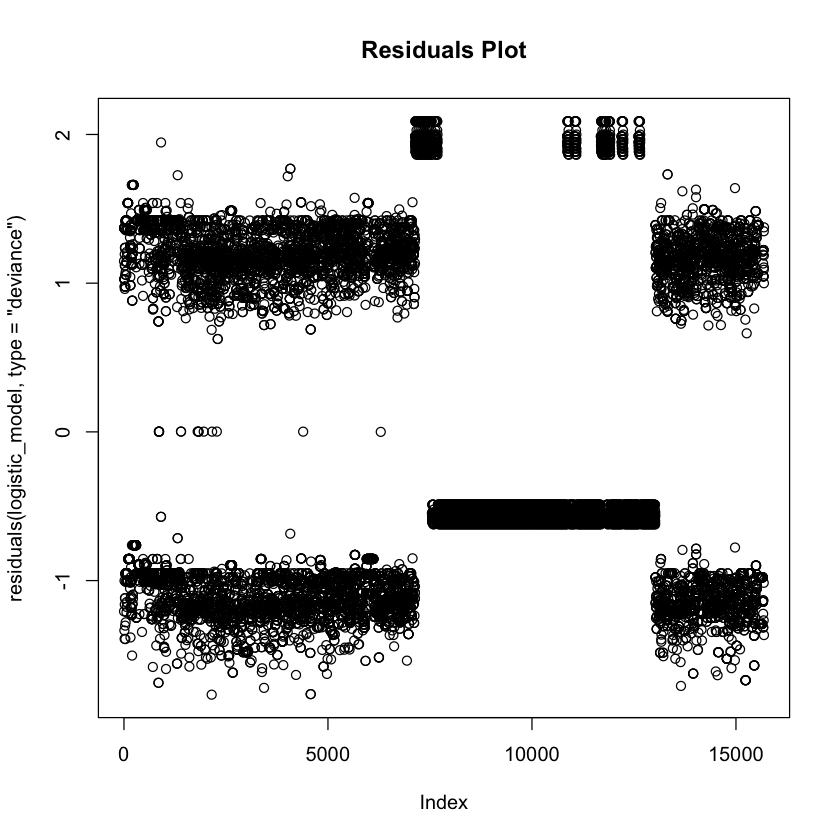

In [15]:
# Check Multicollinearity
vif(logistic_model)

# Residual Plots
plot(residuals(logistic_model, type = "deviance"), main = "Residuals Plot")

### Stepwise Model Selection

In [16]:
# Perform Stepwise Selection
step_model <- step(logistic_model, direction = "both", trace = FALSE)

# Summary of Selected Model
summary(step_model)

# Odds Ratios of Selected Model
exp(cbind(OR = coef(step_model), confint(step_model)))


Call:
glm(formula = Severe ~ TRAV_SP + DR_DRINKNAME + WEATHERNAME + 
    LGT_CONDNAME, family = "binomial", data = data_clean)

Coefficients:
                                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)                         -5.357e-01  8.682e-01  -0.617 0.537257    
TRAV_SP                              9.497e-03  7.176e-04  13.233  < 2e-16 ***
DR_DRINKNAMEYes                      4.215e-01  7.050e-02   5.979 2.25e-09 ***
WEATHERNAMEBlowing Snow             -4.371e-02  9.836e-01  -0.044 0.964553    
WEATHERNAMEClear                     1.325e-01  8.669e-01   0.153 0.878534    
WEATHERNAMECloudy                    2.036e-01  8.677e-01   0.235 0.814478    
WEATHERNAMEFog, Smog, Smoke          2.524e-02  8.825e-01   0.029 0.977183    
WEATHERNAMEFreezing Rain or Drizzle  2.085e-01  1.081e+00   0.193 0.847075    
WEATHERNAMENot Reported              5.530e-01  9.463e-01   0.584 0.558979    
WEATHERNAMEOther                    -3.236e-02  1.023e+00  -0.032 0

Waiting for profiling to be done...

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted proba

,OR,2.5 %,97.5 %
(Intercept),5.852818e-01,8.088266e-02,3.0118686
TRAV_SP,1.009542e+00,1.008125e+00,1.0109654
DR_DRINKNAMEYes,1.524286e+00,1.328134e+00,1.7510395
WEATHERNAMEBlowing Snow,9.572287e-01,1.469601e-01,8.1966512
WEATHERNAMEClear,1.141666e+00,2.224378e-01,8.2462479
WEATHERNAMECloudy,1.225810e+00,2.384673e-01,8.8634253
"WEATHERNAMEFog, Smog, Smoke",1.025560e+00,1.936573e-01,7.5701429
WEATHERNAMEFreezing Rain or Drizzle,1.231847e+00,1.545189e-01,12.3546997
WEATHERNAMENot Reported,1.738390e+00,2.894141e-01,14.0980294
WEATHERNAMEOther,9.681594e-01,1.359218e-01,8.7928964


### Random Forest Model

Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"



Call:
 randomForest(formula = Severe ~ TRAV_SP + DR_DRINKNAME + WEATHERNAME +      LGT_CONDNAME + VSURCONDNAME, data = data_clean, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 1

          Mean of squared residuals: 0.1968101
                    % Var explained: 13.76


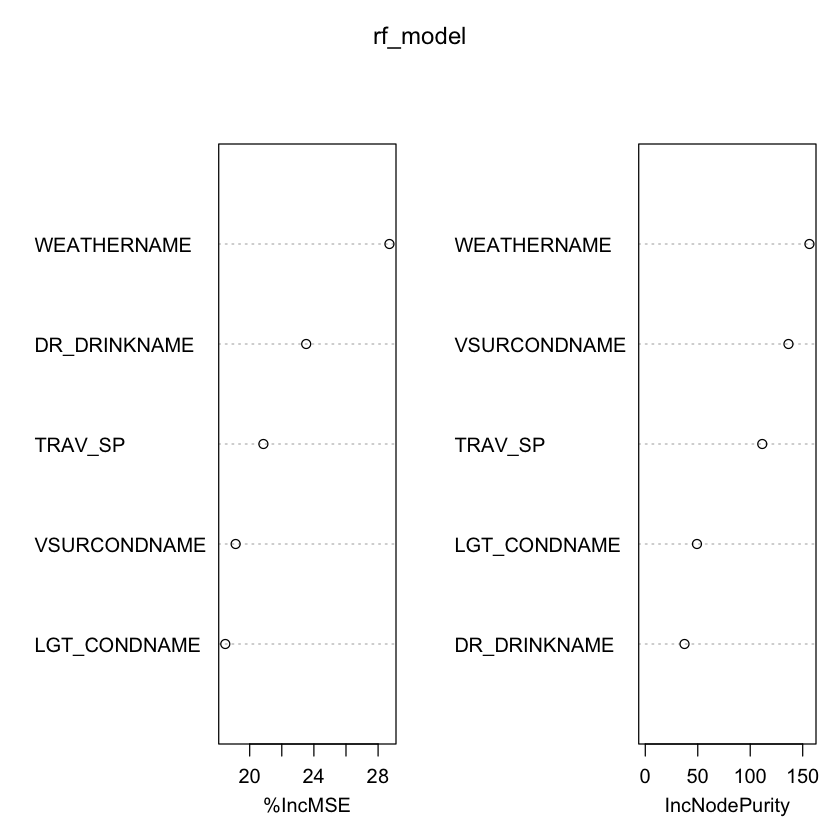

In [17]:
# Fit Random Forest Model
rf_model <- randomForest(Severe ~ TRAV_SP + DR_DRINKNAME + WEATHERNAME +
                           LGT_CONDNAME + VSURCONDNAME, 
                         data = data_clean, 
                         importance = TRUE)

# Random Forest Results
print(rf_model)

# Variable Importance
varImpPlot(rf_model)

In [20]:
# Logistic Regression Results
logistic_preds <- ifelse(predict(step_model, type = "response") > 0.5, 1, 0)
conf_matrix <- table(Predicted = logistic_preds, Actual = data_clean$Severe)
accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)
print(paste("Logistic Model Accuracy: ", accuracy))

# Random Forest Results
rf_preds <- predict(rf_model, data_clean, type = "response")
rf_conf_matrix <- table(Predicted = rf_preds, Actual = data_clean$Severe)
rf_accuracy <- sum(diag(rf_conf_matrix)) / sum(rf_conf_matrix)
print(paste("Random Forest Accuracy: ", rf_accuracy))

[1] "Logistic Model Accuracy:  0.675336265697711"
[1] "Random Forest Accuracy:  0.00815962261745394"


### testing new interactions

In [27]:
# Refit logistic regression with interactions
refined_model <- glm(Severe ~ TRAV_SP * WEATHERNAME + TRAV_SP * VSURCONDNAME +
                     DR_DRINKNAME * LGT_CONDNAME, 
                     family = "binomial", data = data_clean)

# Summary of the refined model
summary(refined_model)

# Calculate AIC
aic_refined <- AIC(refined_model)
print(paste("AIC of Refined Model: ", aic_refined))



Call:
glm(formula = Severe ~ TRAV_SP * WEATHERNAME + TRAV_SP * VSURCONDNAME + 
    DR_DRINKNAME * LGT_CONDNAME, family = "binomial", data = data_clean)

Coefficients: (2 not defined because of singularities)
                                                        Estimate Std. Error
(Intercept)                                           -5.686e-01  8.686e-01
TRAV_SP                                               -4.070e-04  7.744e-03
WEATHERNAMEBlowing Snow                                7.815e-01  1.496e+00
WEATHERNAMEClear                                       1.594e-01  8.672e-01
WEATHERNAMECloudy                                      1.501e-01  8.700e-01
WEATHERNAMEFog, Smog, Smoke                            9.303e-02  8.976e-01
WEATHERNAMEFreezing Rain or Drizzle                   -1.917e+00  3.822e+00
WEATHERNAMENot Reported                                1.107e+00  1.078e+00
WEATHERNAMEOther                                       8.360e-01  1.327e+00
WEATHERNAMERain                

[1] "AIC of Refined Model:  18129.1449728962"


         Actual
Predicted    0    1
        0 8388 3270
        1 1770 2248
[1] "Accuracy of Refined Model:  0.678489410563919"


Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "AUC:  0.716132737756139"


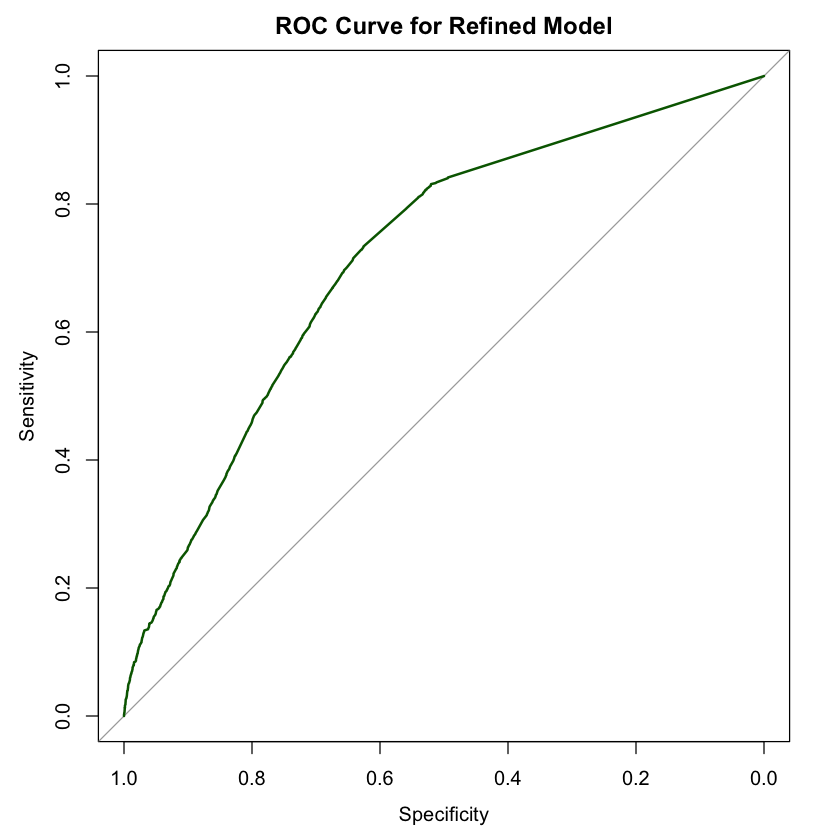

In [30]:
# Confusion Matrix and Accuracy
refined_preds <- ifelse(predict(refined_model, type = "response") > 0.5, 1, 0)
conf_matrix_refined <- table(Predicted = refined_preds, Actual = data_clean$Severe)
print(conf_matrix_refined)

# Accuracy
accuracy_refined <- sum(diag(conf_matrix_refined)) / sum(conf_matrix_refined)
print(paste("Accuracy of Refined Model: ", accuracy_refined))

# ROC Curve and AUC
roc_curve_refined <- roc(data_clean$Severe, predict(refined_model, type = "response"))
plot(roc_curve_refined, main = "ROC Curve for Refined Model", col = "darkgreen", lwd = 2)
auc_refined <- auc(roc_curve_refined)
print(paste("AUC: ", auc_refined))


In [31]:
# Simplify the model by removing non-significant terms
simplified_model <- glm(Severe ~ TRAV_SP + DR_DRINKNAME + WEATHERNAME +
                        LGT_CONDNAME, 
                        family = "binomial", data = data_clean)

# Summary of the simplified model
summary(simplified_model)

# Compare AIC
aic_simplified <- AIC(simplified_model)
print(paste("AIC of Simplified Model: ", aic_simplified))



Call:
glm(formula = Severe ~ TRAV_SP + DR_DRINKNAME + WEATHERNAME + 
    LGT_CONDNAME, family = "binomial", data = data_clean)

Coefficients:
                                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)                         -0.5364918  0.8682190  -0.618 0.536627    
TRAV_SP                              0.0094962  0.0007177  13.231  < 2e-16 ***
DR_DRINKNAMEYes                      0.4228690  0.0705404   5.995 2.04e-09 ***
WEATHERNAMEBlowing Snow             -0.0433718  0.9836064  -0.044 0.964829    
WEATHERNAMEClear                     0.1323360  0.8669082   0.153 0.878672    
WEATHERNAMECloudy                    0.2037413  0.8676706   0.235 0.814353    
WEATHERNAMEFog, Smog, Smoke          0.0246319  0.8824510   0.028 0.977732    
WEATHERNAMEFreezing Rain or Drizzle  0.1939360  1.0811764   0.179 0.857643    
WEATHERNAMENot Reported              0.5534977  0.9462671   0.585 0.558596    
WEATHERNAMEOther                    -0.0321470  1.0234592  -0.031 0

[1] "AIC of Simplified Model:  18166.6858242532"
